<IPython.core.display.Javascript object>


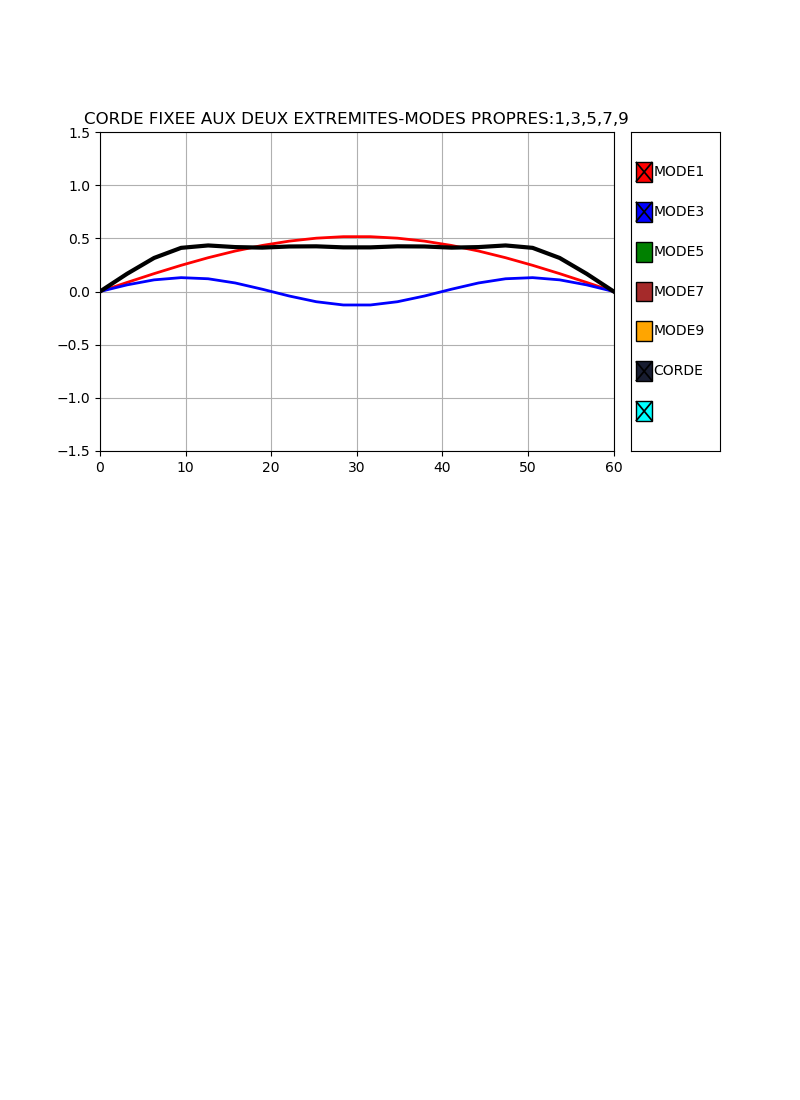

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np 
from numpy import sin,cos,tan

from matplotlib.widgets import Slider,RadioButtons,AxesWidget,CheckButtons
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrowPatch, Circle, Rectangle
from matplotlib.pyplot import Line2D
from matplotlib.text import Text
import six

"""
Proposition de deux animmations
--> animation N°1: corde fixée aux deux extrémités; possibilités de visualiser les modes propores stop-start
--> animation N°2: corde de Melde avec réglage de la fréquence (ohmega) à une extrémité; oscillation
"""
pi=np.pi 





class CheckButtonsV(AxesWidget):
    """
    A GUI neutral set of check buttons.

    For the check buttons to remain responsive you must keep a
    reference to this object.

    The following attributes are exposed

     *ax*
        The :class:`matplotlib.axes.Axes` instance the buttons are
        located in

     *labels*
        List of :class:`matplotlib.text.Text` instances

     *lines*
        List of (line1, line2) tuples for the x's in the check boxes.
        These lines exist for each box, but have ``set_visible(False)``
        when its box is not checked.

     *rectangles*
        List of :class:`matplotlib.patches.Rectangle` instances

    Connect to the CheckButtons with the :meth:`on_clicked` method
    """
    def __init__(self, ax, labels, actives):
        """
        Add check buttons to :class:`matplotlib.axes.Axes` instance *ax*

        *labels*
            A len(buttons) list of labels as strings

        *actives*
            A len(buttons) list of booleans indicating whether
             the button is active
        """
        AxesWidget.__init__(self, ax)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_navigate(False)
        

        if len(labels) > 1:
            dy = 1. / (len(labels) + 1)
            ys = np.linspace(1 - dy, dy, len(labels))
        else:
            dy = 0.25
            ys = [0.5]

        cnt = 0
        axcolor = ax.get_facecolor()

        self.labels = []
        self.lines = []
        self.rectangles = []
        couls=["red","blue","green","brown","orange","#181D31","cyan"]
        lineparams = {'color': 'k', 'linewidth': 1.25,
                      'transform': ax.transAxes, 'solid_capstyle': 'butt'}
        for y, label in zip(ys, labels):
            t = ax.text(0.25, y, label, transform=ax.transAxes,
                        horizontalalignment='left',
                        verticalalignment='center')

            w, h = dy*1.5 , dy / 2.
            x, y = 0.05, y - h / 2.

            p = Rectangle(xy=(x, y), width=w, height=h, edgecolor='black',
                          facecolor=couls[cnt], transform=ax.transAxes)

            l1 = Line2D([x, x + w], [y + h, y], **lineparams)
            l2 = Line2D([x, x + w], [y, y + h], **lineparams)

            l1.set_visible(actives[cnt])
            l2.set_visible(actives[cnt])
            self.labels.append(t)
            self.rectangles.append(p)
            self.lines.append((l1, l2))
            ax.add_patch(p)
            ax.add_line(l1)
            ax.add_line(l2)
            cnt += 1

        self.connect_event('button_press_event', self._clicked)

        self.cnt = 0
        self.observers = {}

    def _clicked(self, event):
        if self.ignore(event):
            return
        if event.button != 1:
            return
        if event.inaxes != self.ax:
            return

        for i, (p, t) in enumerate(zip(self.rectangles, self.labels)):
            if (t.get_window_extent().contains(event.x, event.y) or
                    p.get_window_extent().contains(event.x, event.y)):
                self.set_active(i)
                break
        else:
            return

    def set_active(self, index):
        """
        Directly (de)activate a check button by index.

        *index* is an index into the original label list
            that this object was constructed with.
            Raises ValueError if *index* is invalid.

        Callbacks will be triggered if :attr:`eventson` is True.

        """
        if 0 > index >= len(self.labels):
            raise ValueError("Invalid CheckButton index: %d" % index)

        l1, l2 = self.lines[index]
        l1.set_visible(not l1.get_visible())
        l2.set_visible(not l2.get_visible())

        if self.drawon:
            self.ax.figure.canvas.draw()

        if not self.eventson:
            return
        for cid, func in six.iteritems(self.observers):
            func(self.labels[index].get_text())

    def get_status(self):
        """
        returns a tuple of the status (True/False) of all of the check buttons
        """
        return [l1.get_visible() for (l1, l2) in self.lines]

    def on_clicked(self, func):
        """
        When the button is clicked, call *func* with button label

        A connection id is returned which can be used to disconnect
        """
        cid = self.cnt
        self.observers[cid] = func
        self.cnt += 1
        return cid

    def disconnect(self, cid):
        """remove the observer with connection id *cid*"""
        try:
            del self.observers[cid]
        except KeyError:
            pass

class Gestion:
    def __init__(self,ax):
        self.ww2=4000
        self.voir2=True
        self.voir3=True
        self.Long=60
        self.cc=100
        self.FF=82
        
        xx=np.linspace(0,self.Long,20)
        y1=np.zeros_like(xx)

        
        ll1,=ax.plot(xx,y1,color="red",lw=2)
        ll3,=ax.plot(xx,y1,color="blue",lw=2)
        ll5,=ax.plot(xx,y1,color="green",visible=False,lw=2)
        ll7,=ax.plot(xx,y1,color="brown",visible=False)
        ll9,=ax.plot(xx,y1,color="orange",lw=2,visible=False)
        ll,=ax.plot(xx,y1,color="black",lw=3,visible=False)
        self.lines = [ll1, ll3, ll5,ll7,ll9,ll]

     
fig = plt.figure(figsize=(8,11))
fig.suptitle("POM : ONDES STATIONNAIRES: ")

axe1=plt.subplot(13,6,(1,29))
axe1.set_xlim(0,60)
axe1.set_ylim(-1.5,1.5)
axe1.set_title("CORDE FIXEE AUX DEUX EXTREMITES-MODES PROPRES:1,3,5,7,9" )
#axe1.set_xlabel('m')
axe1.locator_params

gestion=Gestion(axe1)
#axe11.set_aspect("equal") extrémités




"""
Long2=60
axe2=plt.subplot(13,6,(37,65))
axe2.set_xlim(0,60)
axe2.set_ylim(-10,10)
axe2.set_title("CORDE DE MELDE -"+str(Long2)+"cm - OSCILLATIONS")

axe2.grid()
#axe22.set_aspect("equal")
#axe2.set_facecolor("blue")

vv2=110 #m/s
ww2=gestion.ww2
xx2=np.linspace(0,Long2,200)
kk2=ww2/vv2
aa=1
tt=0
zz=aa*(sin(kk2*(Long2-xx2)/100)/sin(kk2*Long2/100))*cos(ww2*tt)
melde,=axe2.plot(xx2,zz,color="black",lw=4)
vitesse2=Text(20,8,"c="+str(vv2)+"m/s",fontsize=12,fontweight="bold")
omega2=Text(45,6,"ω="+str(ww2)+"rad/s",fontsize=12,fontweight="bold")

lamb2=vv2/(ww2/2/pi)
lamb2=np.round(lamb2,1)
lambda2=Text(20,6,"λ="+str(lamb2)+"cm",fontsize=12,fontweight="bold")
axe2.add_artist(vitesse2)
axe2.add_artist(lambda2)
axe2.add_artist(omega2)
axe2.set_xlabel("cm")
"""
axe11=plt.subplot(13,6,(6,30))

#axe11.set_aspect("equal")
#axe11.set_facecolor("red")
axe1.grid()




"""
def update_courbe():
    statuts=bouton11.get_status()
    
    if(statuts[0]==True):    #on met l'animation sur pause
        gestion.ll1.set_visible(True)
    else:
        gestion.ll1.set_visible(False)
    
    if(statuts[1]==True):    #on met l'animation sur pause
        gestion.ll3.set_visible(True)
    else:
        gestion.ll3.set_visible(False)
    if(statuts[2]==True):    #on met l'animation sur pause
        gestion.ll5.set_visible(True)
    else:
        gestion.ll5.set_visible(False)
    if(statuts[3]==True):    #on met l'animation sur pause
        gestion.ll7.set_visible(True)
    else:
        gestion.ll7.set_visible(False)
    if(statuts[4]==True):    #on met l'animation sur pause
        gestion.ll9.set_visible(True)
    else:
        gestion.ll9.set_visible(False)
    if(statuts[5]==True):    #on met l'animation sur pause
        gestion.ll.set_visible(True)
    else:
        gestion.ll.set_visible(False)
     
    if(statuts[6]==True):    #on met l'animation sur pause
        animation.event_source.start()
    
    else:
        animation.event_source.stop()
"""

def func_anim(duree):
    Long=60
    max=1.5
    cc=120 #m/s
    FF=82  #hertz
    xx=np.linspace(0,Long,20)
    tt=duree/50.0
    print("tt=",tt)
    
    y1=0.81*max*cos(pi*cc*tt/Long)*sin(pi*xx/Long)
    y3=-0.09*max*cos(3*pi*cc*tt/Long)*sin(3*pi*xx/Long)
    y5=0.032*max*cos(5*pi*cc*tt/Long)*sin(5*pi*xx/Long)
    y7=-0.016*max*cos(7*pi*cc*tt/Long)*sin(7*pi*xx/Long)
    y9=0.01*max*cos(9*pi*cc*tt/Long)*sin(9*pi*xx/Long)
    
    yy=y1+y3+y5+y7+y9
    #axe1.plot(xx,yy,color="black",gid="courbe",lw=4)
    """
    ll1=gestion.lines[0]
    ll3=gestion.lines[1]
    ll5.gestion.lines[2]
    ll7=gestion.lines[3]
    ll9=gestion.lines[4]
    ll=gestion.lines[5]
    
    ll1.set_ydata(y1)
    ll3.set_ydata(y3)
    ll5.set_ydata(y5)
    ll7.set_ydata(y7)
    ll9.set_ydata(y9)
    ll.set_ydata(yy)
    """
   
    
    gestion.lines[0].set_ydata(y1)
    gestion.lines[1].set_ydata(y3)
    gestion.lines[2].set_ydata(y5)
    gestion.lines[3].set_ydata(y7)
    gestion.lines[4].set_ydata(y9)
    gestion.lines[5].set_ydata(yy)

   
debut=0
fin=100
animation=FuncAnimation(fig,func_anim,100,interval=5,repeat=True)

label11=("MODE1","MODE3","MODE5","MODE7","MODE9","CORDE","STOP")

active11=(True,True,False,False,False,False,True)
bouton11= CheckButtonsV(axe11,label11,actives=active11)
bouton11.on_clicked(update_courbe)

def update_courbe(label):
    index = label11.index(label)
    ligne=gestion.lines[index]
    ligne.set_visible(not ligne.get_visible())
    #plt.draw()
"""
slider33=Slider(axe33,"ω =", 3, 60, 40,valfmt='%3.3f',color='red',fc='yellow')
label_slider33=slider33.label
label_slider33.set_x(0.7)
label_slider33.set_fontweight("bold")
slider33.valtext.set_text(str(ww2))
text_slider33=slider33.valtext
text_slider33.set_x(0.80)
text_slider33.set_fontweight("bold")
text_slider33.set_horizontalalignment("center")
slider33.on_changed(update_frequence)
"""
plt.show()